In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
df= pd.read_csv("Rainfall (1).csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:

from sklearn.impute import SimpleImputer
num_col = df.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_col] = imputer.fit_transform(df[num_col])

cat_col = df.select_dtypes(include=['object']).columns
imputer1 = SimpleImputer(strategy='most_frequent')
df[cat_col] = imputer1.fit_transform(df[cat_col])

In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

def histograms(df, features, rows, cols):
    fig = plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df[feature].hist(bins=20, ax=ax, facecolor='blue')
        ax.set_title(feature)
    fig.tight_layout()
    plt.show()


<ipython-input-8-dedc0fe3a78b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [9]:
def boxplots(df, features, rows, cols):
    fig = plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(y=df[feature], ax=ax)
        ax.set_title(feature)
    fig.tight_layout()
    plt.show()




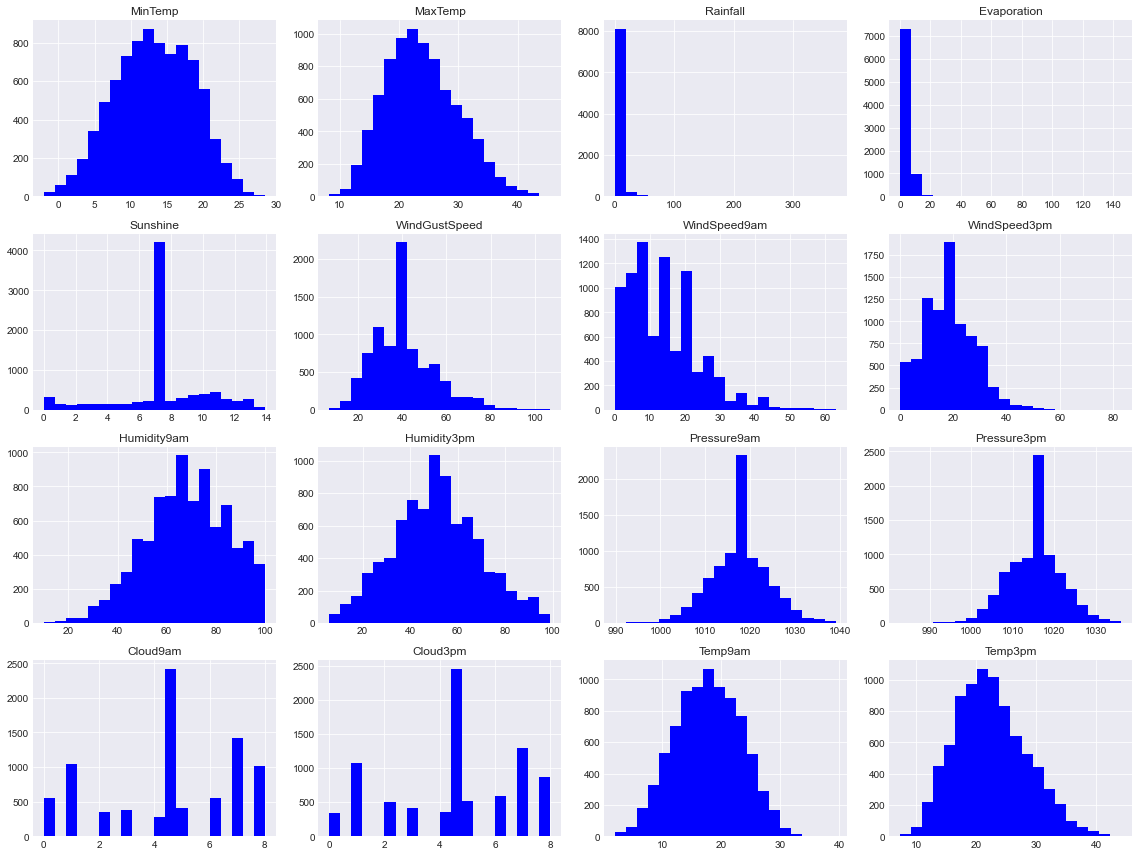

In [10]:
num_var = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']


histograms(df, num_var, 4, 4)


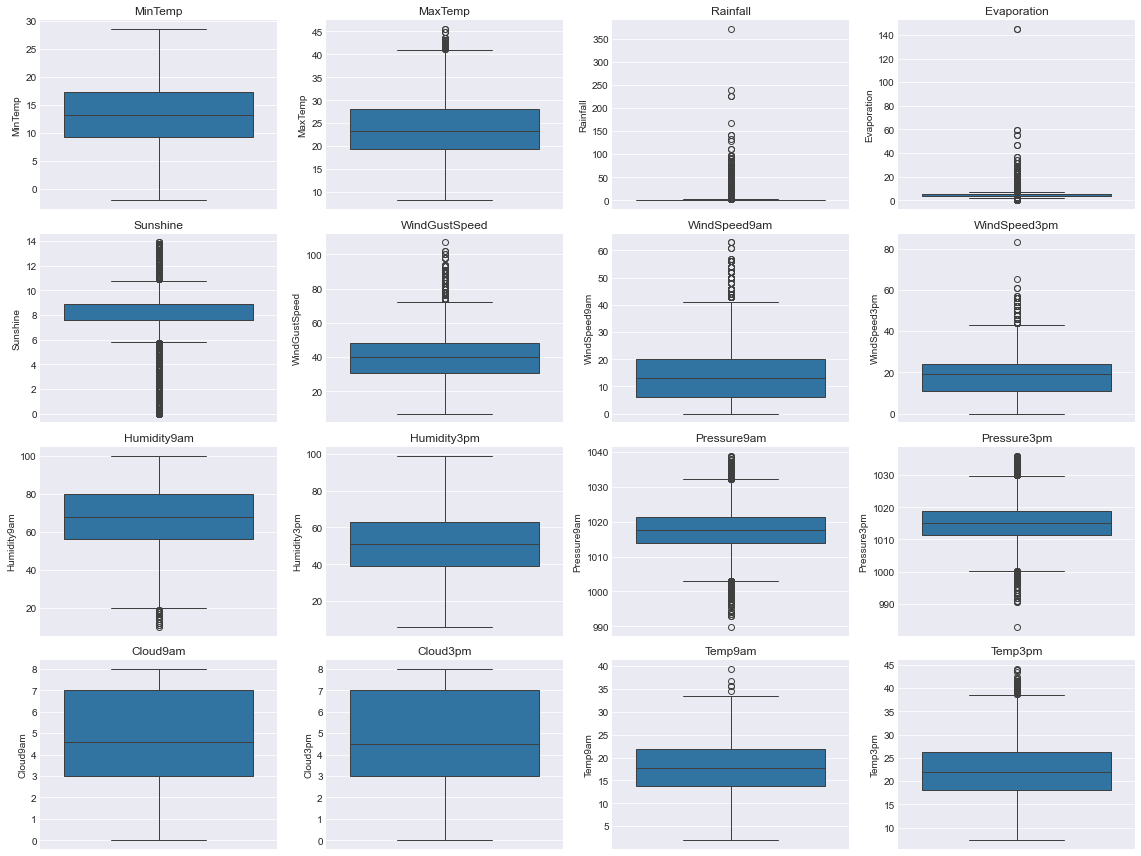

In [11]:
boxplots(df, num_var, 4, 4)

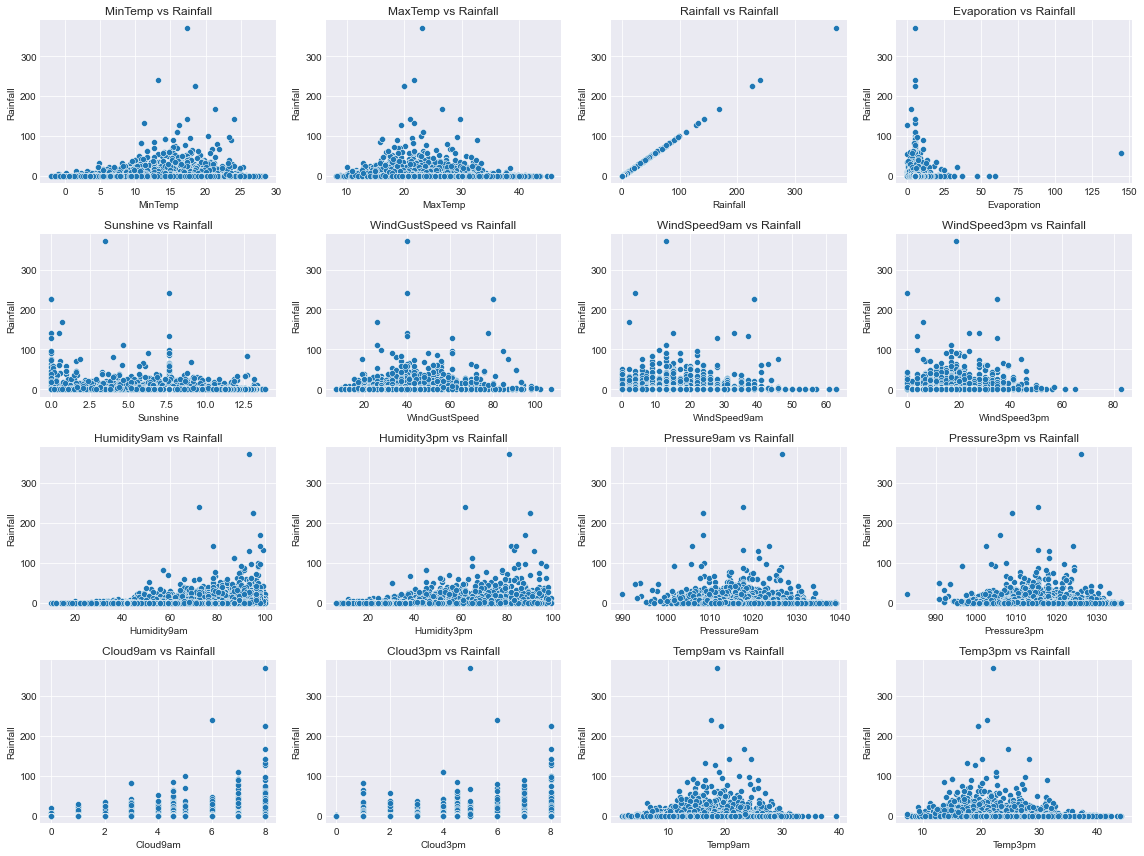

In [12]:

def plot_scatter(df, features, target):
    fig = plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(4, 4, i+1)
        sns.scatterplot(x=df[feature], y=df[target], ax=ax)
        ax.set_title(f'{feature} vs {target}')
    fig.tight_layout()
    plt.show()


plot_scatter(df, num_var, 'Rainfall')




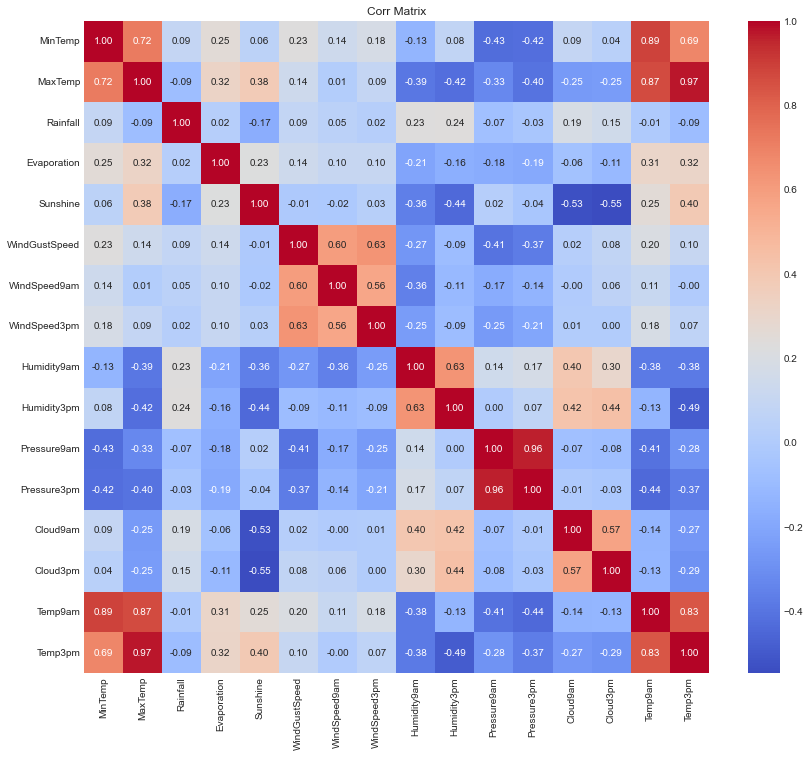

In [13]:

plt.figure(figsize=(14, 12))
corr_matrix = df[num_var].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corr Matrix')
plt.show()



The correlation matrix showing that MinTemp and MaxTemp which i sapprox 0.72 and Temp9am and Temp3pm i.e. 0.83 have strong positive correlations, indicating similar trends. Pressure9am and Humidity9am i.e. -0.43 show a negative correlation, suggesting inverse relationships. Other variables exhibit moderate to weak correlations, indicating diverse interactions within the dataset.

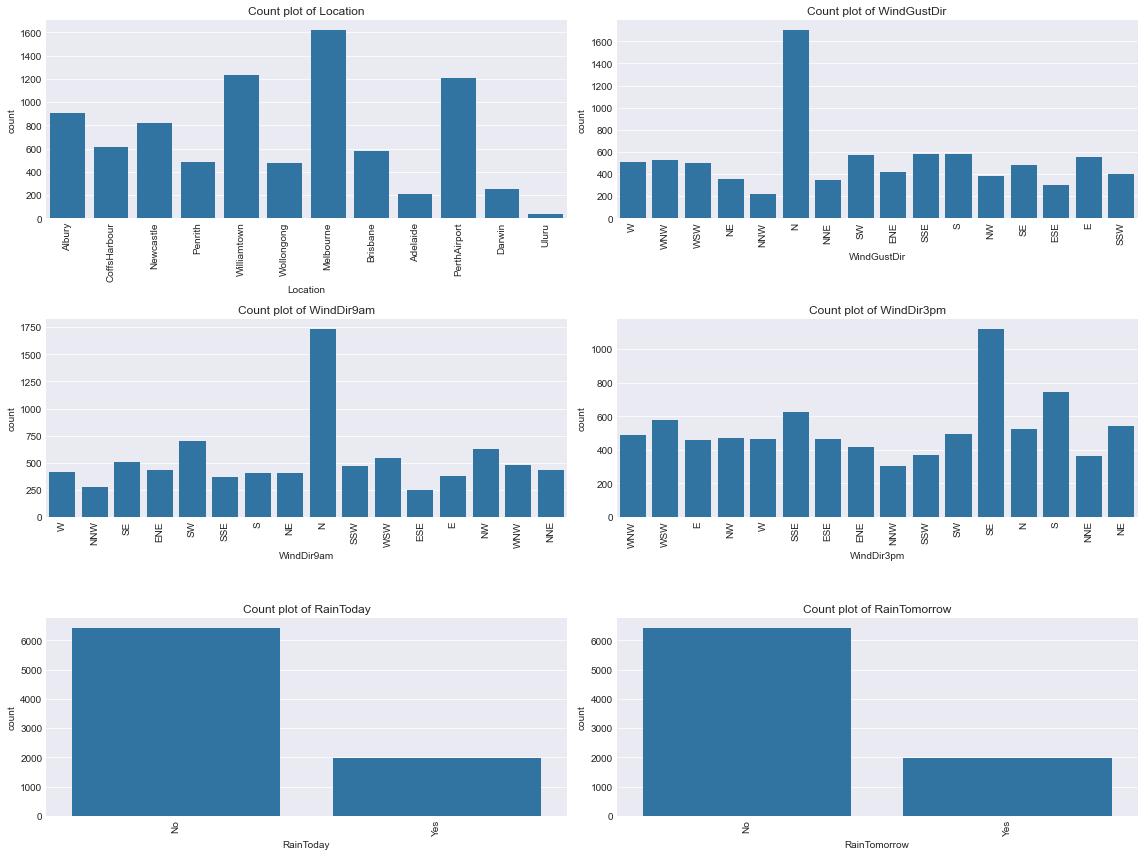

In [16]:
cat_var = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(cat_var):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
df = df.drop('Date', axis=1)
cat_var = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

label_encoders = {}
for column in cat_var:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

num_var = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']

scaler = StandardScaler()
df[num_var] = scaler.fit_transform(df[num_var])

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data shapes:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Training and testing data shapes:
(6740, 21) (1685, 21) (6740,) (1685,)


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
log = LogisticRegression(max_iter=1000, random_state=42)

log.fit(X_train, y_train)

y_pred_train = log.predict(X_train)
y_pred_test= log.predict(X_test)


train_accuracy= accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
roc_auc= roc_auc_score(y_test, log.predict_proba(X_test)[:, 1])

print(f"Logistic Regression Training Accuracy: {train_accuracy}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy}")
print("Logistic Regression Confusion Matrix:\n", conf_matrix)
print("Logistic Regression Classification Report:\n", class_report)
print(f"Logistic Regression ROC AUC Score: {roc_auc}")

cv_scores = cross_val_score(log, X, y, cv=5)
print("Logistic Regression Cross-validation scores:", cv_scores)
print("Logistic Regression Mean CV score:", np.mean(cv_scores))


Logistic Regression Training Accuracy: 0.8280415430267062
Logistic Regression Testing Accuracy: 0.8504451038575668
Logistic Regression Confusion Matrix:
 [[1240   74]
 [ 178  193]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1314
           1       0.72      0.52      0.61       371

    accuracy                           0.85      1685
   macro avg       0.80      0.73      0.76      1685
weighted avg       0.84      0.85      0.84      1685

Logistic Regression ROC AUC Score: 0.8667040004594928
Logistic Regression Cross-validation scores: [0.86172107 0.79228487 0.78753709 0.81661721 0.85875371]
Logistic Regression Mean CV score: 0.8233827893175075


The model above shows a training accuracy of 82.80% and a testing accuracy of 85.04%, indicating slight overfitting. The model's precision, recall, and F1-scores suggest better performance for predicting class 0 which is no rain than class 1 which is rain. The ROC AUC score is 0.867, demonstrating good outcome. Cross-validation scores are consistent, with a mean CV score of 82.33%, indicating reliable model performance on unseen data.

Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=100, random_state=42)

rf_class.fit(X_train, y_train)

y_pred_train1 = rf_class.predict(X_train)
y_pred_test1= rf_class.predict(X_test)

train_accuracy1= accuracy_score(y_train, y_pred_train)
test_accuracy1 = accuracy_score(y_test, y_pred_test)
conf_matrix1 = confusion_matrix(y_test, y_pred_test)
class_report1 = classification_report(y_test, y_pred_test)
roc_auc_rf1 = roc_auc_score(y_test, rf_class.predict_proba(X_test)[:, 1])

print(f"Random Forest Training Accuracy: {train_accuracy1}")
print(f"Random Forest Testing Accuracy: {test_accuracy1}")
print("Random Forest Confusion Matrix:\n", conf_matrix1)
print("Random Forest Classification Report:\n", class_report1)
print(f"Random Forest ROC AUC Score: {roc_auc_rf1}")


cv_scores1 = cross_val_score(rf_class, X, y, cv=5)
print("Random Forest Cross-validation scores:", cv_scores1)
print("Random Forest Mean CV score:", np.mean(cv_scores1))


Random Forest Training Accuracy: 0.8280415430267062
Random Forest Testing Accuracy: 0.8504451038575668
Random Forest Confusion Matrix:
 [[1240   74]
 [ 178  193]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1314
           1       0.72      0.52      0.61       371

    accuracy                           0.85      1685
   macro avg       0.80      0.73      0.76      1685
weighted avg       0.84      0.85      0.84      1685

Random Forest ROC AUC Score: 0.9394997682022753
Random Forest Cross-validation scores: [0.8504451  0.85103858 0.89080119 0.82967359 0.85281899]
Random Forest Mean CV score: 0.8549554896142434


The RF model exhibits a training accuracy of 82.80% and a testing accuracy of 85.04%, indicating minimal overfitting. The classification report shows high precision, recall, and F1-scores for class 0 and good performance for class 1. The ROC AUC score is 0.939, indicating excellent discrimination between classes. Cross-validation scores are consistent, with a mean CV score of 85.50%, reflecting strong model performance on unseen data.

Random Forest Model using GridSearch CV

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_class1 = RandomForestClassifier(random_state=42)

grid_search1 = GridSearchCV(estimator=rf_class1, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search1.fit(X_train, y_train)

best_params = grid_search1.best_params_
best_rf1 = grid_search1.best_estimator_

print("Best Parameters:", best_params)

y_pred_train2 = best_rf1.predict(X_train)
y_pred_test2 = best_rf1.predict(X_test)

train_accuracy2 = accuracy_score(y_train, y_pred_train2)
test_accuracy2= accuracy_score(y_test, y_pred_test2)
roc_auc2 = roc_auc_score(y_test, best_rf1.predict_proba(X_test)[:, 1])

print(f"Best Random Forest Training Accuracy: {train_accuracy2}")
print(f"Best Random Forest Testing Accuracy: {test_accuracy2}")
print(f"Best Random Forest ROC AUC Score: {roc_auc2}")
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_test2))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Training Accuracy: 0.9982195845697329
Best Random Forest Testing Accuracy: 0.9157270029673591
Best Random Forest ROC AUC Score: 0.9421408263486322
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1314
           1       0.88      0.72      0.79       371

    accuracy                           0.92      1685
   macro avg       0.90      0.85      0.87      1685
weighted avg       0.91      0.92      0.91      1685



The tuned RF model with the parameters: max_depth: 20, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 300, which achieves 99.82% training accuracy and 91.57% testing accuracy, indicating some overfitting. It shows strong precision, recall, and F1-scores for both classes. The ROC AUC score is 0.942, demonstrating excellent discrimination. This model significantly outperforms previous models.